In [1]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
model = LogisticRegression()

In [3]:
data = pd.read_csv("spam_ham_dataset.csv")

In [4]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
print(data.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [7]:
data.shape

(5171, 4)

In [8]:
data.size

20684

In [9]:
data = data.drop(columns=["Unnamed: 0"])

In [10]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
# Select required columns
data = data[['text','label_num']]

In [12]:
# Features and labels
X = data['text']
y = data['label_num']

In [13]:
# Convert text to numerical form using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=10000,
    ngram_range=(1,2)
)

X_vectorized = vectorizer.fit_transform(X)


In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [15]:
# Train Naive Bayes model
# model = MultinomialNB()
model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",0.5
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [16]:
# Test accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9545893719806763


In [17]:
# Save model and vectorizer
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [18]:
data['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [19]:
data.isnull().sum()

text         0
label_num    0
dtype: int64

In [20]:
# sns.countplot(data=data,x='label')
# f=data['label'].value_counts()
# plt.yticks(f)
# plt.show()

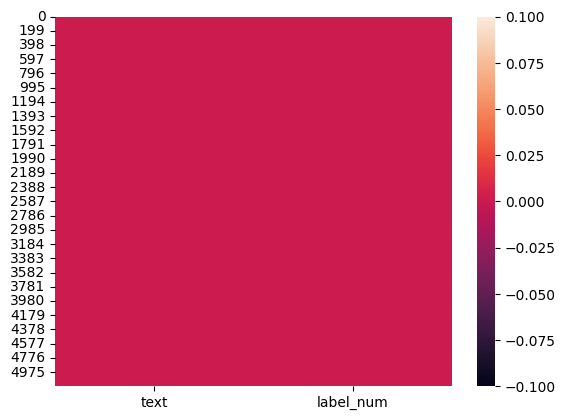

In [21]:
sns.heatmap(data.isnull())
plt.show()

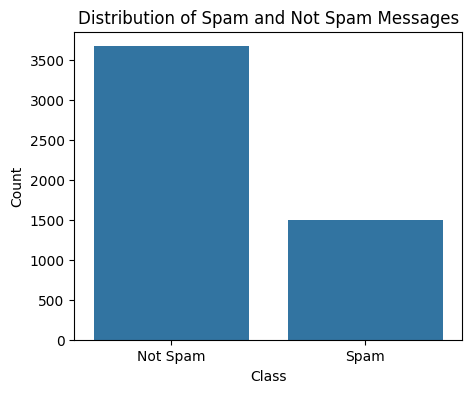

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x=data['label_num'])
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.title("Distribution of Spam and Not Spam Messages")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [23]:
data.dtypes

text         object
label_num     int64
dtype: object

In [24]:
print(data.columns)


Index(['text', 'label_num'], dtype='object')
